In [1]:
import pickle
import pyspark
import cv2
import numpy as np
from json import loads
import matplotlib.pyplot as plt
from pyspark.sql import *

In [2]:
def read_data(filename):
    df = []
    f = open(filename, "rb")
    while True:
        try:
            obj = pickle.load(f)
            df.append(obj)
        except:
            f.close
            return df

In [3]:
df = read_data("data")

In [4]:
sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)

21/12/17 13:01:46 WARN Utils: Your hostname, robin-hppaviliondv6notebookpc resolves to a loopback address: 127.0.1.1; using 192.168.1.17 instead (on interface wlo1)
21/12/17 13:01:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/17 13:01:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/home/robinv/.local/lib/python3.9/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
df2 = sqlContext.createDataFrame(df)
df2.show()

+----+--------------------+--------------------+
|  id|                date|                data|
+----+--------------------+--------------------+
|4068|"2021-12-17T12:59...|[[[129, 47, 185],...|
|4068|"2021-12-17T12:59...|[[[174, 84, 97], ...|
|4068|"2021-12-17T12:59...|[[[220, 142, 238]...|
|4068|"2021-12-17T12:59...|[[[157, 93, 103],...|
|4068|"2021-12-17T12:59...|[[[114, 211, 159]...|
|4068|"2021-12-17T12:59...|[[[117, 97, 49], ...|
|4068|"2021-12-17T12:59...|[[[233, 216, 174]...|
|4068|"2021-12-17T12:59...|[[[166, 70, 106],...|
|4068|"2021-12-17T12:59...|[[[134, 150, 2], ...|
|4068|"2021-12-17T13:00...|[[[166, 14, 169],...|
|4068|"2021-12-17T13:00...|[[[177, 126, 220]...|
|4068|"2021-12-17T13:00...|[[[186, 171, 129]...|
|4068|"2021-12-17T13:00...|[[[77, 154, 59], ...|
|4068|"2021-12-17T13:00...|[[[221, 138, 81],...|
|4068|"2021-12-17T13:00...|[[[219, 84, 20], ...|
|4068|"2021-12-17T13:00...|[[[60, 67, 87], [...|
|4068|"2021-12-17T13:00...|[[[136, 172, 54],...|
|4068|"2021-12-17T13

In [6]:
def to_numpy(img):
    img = np.array([np.array(x, dtype=np.float32) for x in img]) / 255
    return img

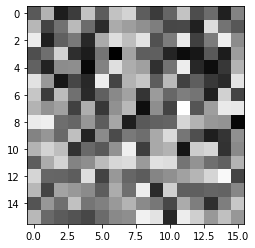

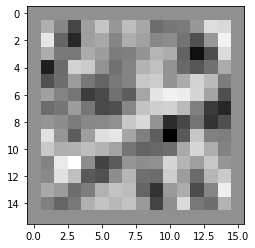

In [7]:
#select all data from df2 and store it in a df named images
images = df2.select('data')
for e in images.collect():
    img = to_numpy(loads(e.data))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    with_sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
    plt.imshow(gray, cmap='gray')
    plt.show()
    plt.imshow(with_sobel, cmap='gray')
    plt.show()
    break

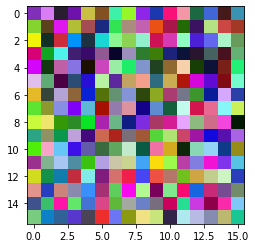

In [8]:
# sql request to get all the images with some id
images_client1 = df2.select('data').where(df2.id == (df2.select('id').distinct().collect()[0][0]))

for image in images_client1.collect():
    plt.imshow(to_numpy(loads(image.data)))
    plt.show()
    break